#**1-Grid SearchCV**

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.
##**Why should I use it?**
If you work with ML, you know what a nightmare it is to stipulate values for hyper parameters. There are libraries that have been implemented, such as GridSearchCV of the sklearn library, in order to automate this process and make life a little bit easier for ML enthusiasts.

First, we need to import GridSearchCV from the sklearn library, a machine learning library for python. The estimator parameter of GridSearchCV requires the model we are using for the hyper parameter tuning process. For this example, we are using the rbf kernel of the Support Vector Regression model(SVR). The param_grid parameter requires a list of parameters and the range of values for each parameter of the specified estimator. The most significant parameters required when working with the rbf kernel of the SVR model are c, gamma and epsilon. A list of values to choose from should be given to each hyper parameter of the model. You can change these values and experiment more to see which value ranges give better performance. A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels.


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

#**2-RandomSearchCV**

Set up a grid of hyperparameter values and select random combinations to train the model and score. The number of search iterations is set based on time/resources.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

#**3-Grid vs. Random Search**

Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. For example, searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used. While Scikit Learn offers the GridSearchCV function to simplify the process, it would be an extremely costly execution both in computing power and time.
By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. Scikit Learn offers the RandomizedSearchCV function for this process.
While it’s possible that RandomizedSearchCV will not find as accurate of a result as GridSearchCV, it surprisingly picks the best result more often than not and in a fraction of the time it takes GridSearchCV would have taken. Given the same resources, Randomized Search can even outperform Grid Search. This can be visualized in the graphic below when continuous parameters are used.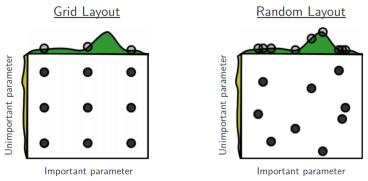

In order to compare the efficiencies of the two methods, I analyzed mobile phone data. Specifically, I analyzed the relation between features of a mobile phone (eg: RAM, Internal Memory, etc) and its selling price. The database has 2000 data points and was built from collecting sales data of mobile phones of various companies.

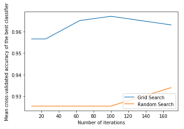

I was surprised to see that Grid Search performed better so I performed the same operation on a dummy data set with the same number of samples and features using Scikit Learn’s “make_classification” function and compared the two again.

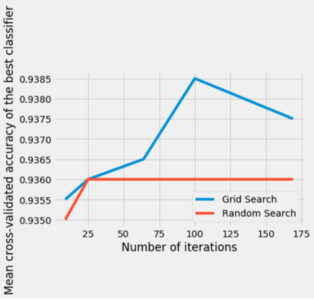

Once again, the Grid Search outperformed the Random Search. This is most likely due to the small dimensions of the data set (only 2000 samples). With larger data sets, it’s advisable to instead perform a Randomized Search.